In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from __future__ import division
import warnings
# Turn off warnings
warnings.filterwarnings('ignore')

If you run this project for the first time you should set the below flags to True, because they create help files. Otherwise, you set them to False and we use the already created files.
* `clean_titles`: If this flag is True, we remove the symbol ';' from title column of BX-Books.csv file and a new BX-Books-new.csv file is created for the books data.
* `multiple_isbn_pickle`: If this flag is True, a big dictionary is extracted into a pickle file for the creation of unique isbns, which will see in detail later.

In [3]:
clean_titles = False
multiple_isbn_pickle = False

In [4]:
if clean_titles:
    books = 'data/BX-Books.csv'
    with open(books, 'rb') as f:
        reader = csv.reader(f, delimiter=";")
        lines = list(reader)

    books_new = 'data/BX-Books-new.csv'
    with open(books_new, 'wb') as f:
        writer = csv.writer(f, delimiter=';')
        for line in lines:
            if len(line) > 8:
                for i in range(1, 1+len(line)-8):
                    line[1] += line[2]
                    line.remove(line[2])
            writer.writerow(line)

Now we are ready to import the data. We define the directory that data are saved. It is recommended to store the downloaded csv files into `data` directory inside this repo. Just for flexibility!

In [5]:
data_dir = 'data'
books_file = os.path.join(data_dir, 'BX-Books-new.csv')
users_file = os.path.join(data_dir, 'BX-Users.csv')
ratings_file = os.path.join(data_dir, 'BX-Book-Ratings.csv')

In [6]:
books = pd.read_csv(books_file, sep=';')
users = pd.read_csv(users_file, sep=';')
ratings = pd.read_csv(ratings_file, sep=';')

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
print('Users: {}\nBooks: {}\nRatings: {}'.format(len(users), len(books), len(ratings)))

Users: 278858
Books: 271379
Ratings: 1149780


## Users data

In [11]:
# Change column names for our needs
users.columns = users.columns.str.strip().str.lower().str.replace('-', '_')
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

We observe that ages reach the value of 244. We are going to keep only values between 5 and 100 years old in order to have more realistic data

In [13]:
users.loc[(users.age<5) | (users.age>100), 'age'] = np.nan
print(sorted(users.age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


Now let's take a look on the number of people according to age

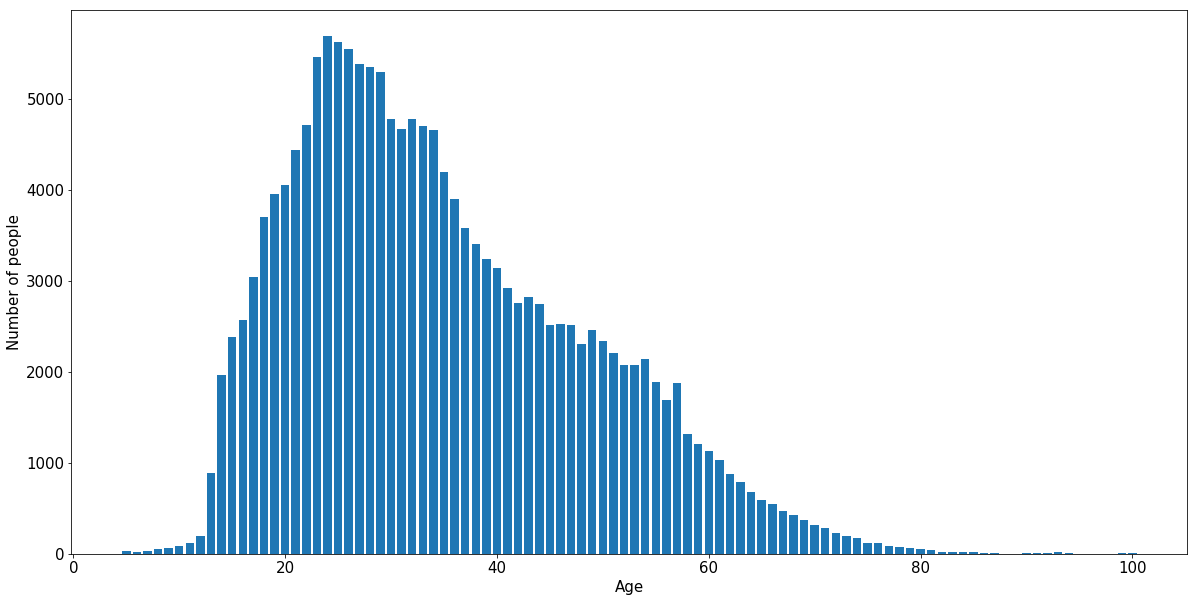

In [14]:
u = users.age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

It's also good to know the missing ages in our data

In [15]:
age_null = users.age.isnull().sum() 
all_users = users.user_id.count()
print('{} empty age values out of {} users.'.format(age_null, all_users, ))

112010 empty age values out of 278858 users.


We split the Location field into City, State, Country.

In [16]:
user_location_expanded = users.location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['city', 'state', 'country']
users = users.join(user_location_expanded)
users.drop(columns=['location'], inplace=True)
users.head()

,user_id,age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [17]:
top_countries = users.country.value_counts()[:10]
print('The 10 countries with the most users are:\n{}'.format(top_countries))

The 10 countries with the most users are:
 usa               139183
 canada             21556
 united kingdom     18286
 germany            17021
 spain              13088
 australia          11719
 italy              11238
                     4561
 france              3440
 portugal            3305
Name: country, dtype: int64


We observe than an empty country is in our data. Let's replace them with NaN and count them

In [18]:
users.country.replace('', np.nan, inplace=True)
nan_country = users.country.isnull().sum()
print('There are {} NaN entries in the Country field'.format(nan_country))

There are 4563 NaN entries in the Country field


## Books data

In [19]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Let's fix the column names and also remove the Image columns. Image gives important information, but for now on we are ok.

In [20]:
books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)
books.columns = books.columns.str.strip().str.lower().str.replace('-', '_')
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [21]:
books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [22]:
# Convert years to float
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

Check for 0's and NaNs in column: Year of Publication

In [23]:
zero_yr = books[books.year_of_publication == 0].year_of_publication.count()
nan_yr = books.year_of_publication.isnull().sum()
print('{} zeros\n {} NaNs'.format(zero_yr, nan_yr))

4619 zeros
 3 NaNs


In [24]:
# Replace all years of zero with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

Now we will take a look on the number of books per year. We observe that some books in the dataset have unrealistic year of publication like 1300 or 2020.

In [25]:
old_books = books[books.year_of_publication<1900] 
future_books = books[books.year_of_publication>2018]
old_books

,isbn,book_title,book_author,year_of_publication,publisher
171826,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806.0,Reprint Services Corp
227544,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus
245622,0781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897.0,Reprint Services Corp
253767,964442011X,Tasht-i khun,Isma°il Fasih,1376.0,Nashr-i Alburz


In [26]:
future_books

,isbn,book_title,book_author,year_of_publication,publisher
30011,068160204X,The Royals,Kitty Kelley,2020.0,Bausch &amp; Lombard
37488,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030.0,Aladdin
55679,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030.0,Aladdin
78171,0870449842,Crossing America,National Geographic Society,2030.0,National Geographic
80267,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050.0,Puffin Books
92160,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020.0,Bausch &amp; Lombard
97830,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050.0,Penguin USA
116058,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038.0,Vintage Books USA
118299,3442436893,Das gro�?�?e B�?¶se- M�?¤dchen- Lesebuch.,Kathy Lette,2026.0,Goldmann
183779,0590085417,Heidi,Johanna Spyri,2021.0,Scholastic


It seems that the outliers are not many and we won't harm our dataset if we remove them. If we keep them, our model performance will be influenced, so we remove them.

In [27]:
print('Books with outliers: {}'. format(len(books)))
books = books.loc[~(books.isbn.isin(old_books.isbn))] 
books = books.loc[~(books.isbn.isin(future_books.isbn))]
print('Books without outliers: {}'. format(len(books)))

Books with outliers: 271379
Books without outliers: 271358


An important observation here is that isbn is unique because it's not dependent only on the book title.

In [28]:
books.isbn.nunique()

271358

#### A really important note is that we want to predict user's behavior according to book rating. So we can import new isbns according to book title and train our model using this isbn. This is not exactly right, because we can exploit during training more features like author, publisher and also the image! But due to restricted computational resources (CPU training) we will simplify our data and train according to book and not the initial isbn.

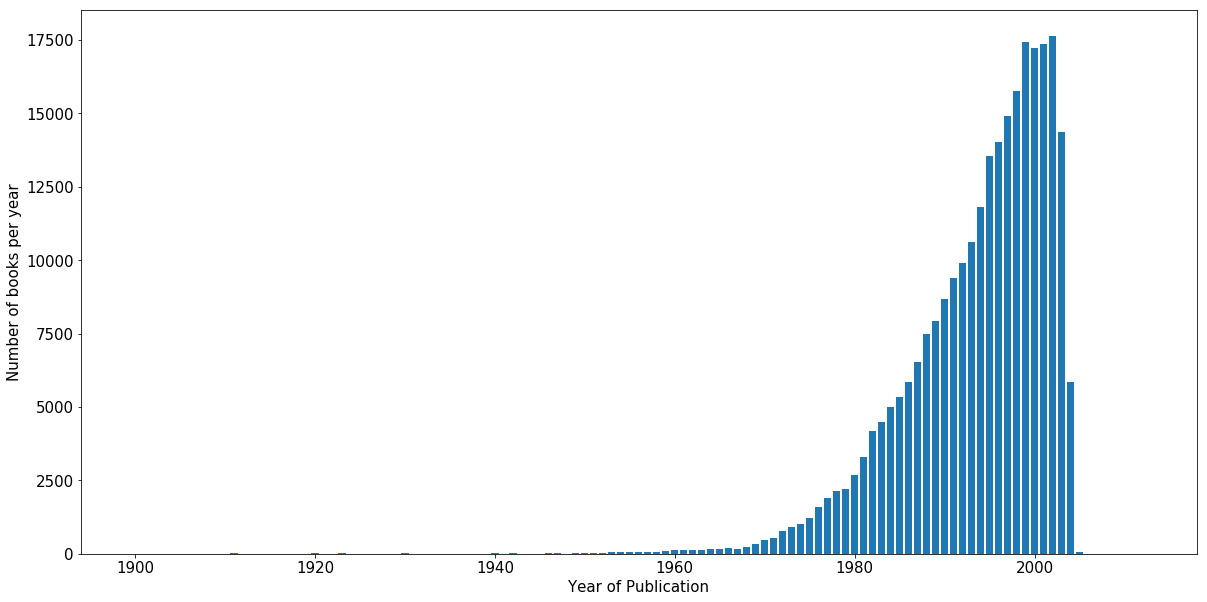

In [29]:
books.year_of_publication.replace(0, np.nan, inplace=True)
yr = books.year_of_publication.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.bar(yr.index, yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('Number of books per year')
plt.show()

Now let's view some interesting statistics like top 10 authors with the most books, top 10 publishers and top 10 titles. We also examine if there are empty strings or NaNs in these columns.

In [30]:
print('Top 10 authors')
books.book_author.value_counts()[:10]

Top 10 authors


Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        373
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: book_author, dtype: int64

In [31]:
books[books.book_author == ''].book_author.count()

0

In [32]:
books.book_author.isnull().sum()

1

In [33]:
print('Top 10 publishers')
books.publisher.value_counts()[:10]

Top 10 publishers


Harlequin                   7536
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3647
Scholastic                  3159
Simon &amp; Schuster        2969
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64

In [34]:
books[books.publisher == ''].publisher.count()

0

In [35]:
books.publisher.isnull().sum()

2

In [36]:
print('Top 10 titles')
books.book_title.value_counts()[:10]

Top 10 titles


Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Adventures of Huckleberry Finn    20
Dracula                           20
The Secret Garden                 20
Jane Eyre                         19
Pride and Prejudice               18
The Night Before Christmas        18
Great Expectations                17
Name: book_title, dtype: int64

In [37]:
books[books.book_title == ''].book_title.count()

0

In [38]:
books.book_title.isnull().sum()

0

## Book ratings data

In [39]:
ratings.columns = ratings.columns.str.strip().str.lower().str.replace('-', '_')
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [40]:
users_ratings = ratings.groupby('user_id').isbn.count().sort_values(ascending=False)
print('Top 10 users with the most ratings:\n {}'.format(users_ratings[:10]))

Top 10 users with the most ratings:
 user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: isbn, dtype: int64


Now let's see the users' distribution according to number of ratings

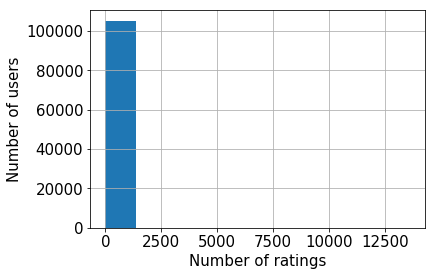

In [41]:
users_ratings.hist()
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

Let's fix this a little bit to observe the outliers

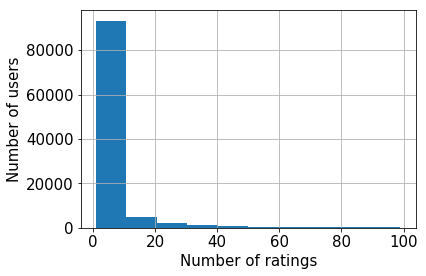

In [42]:
user_h = users_ratings.where(users_ratings<100)
user_h.hist()
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

It's obvious that the most users have rated 1-10 books. Now let's see the ratings' distribution.

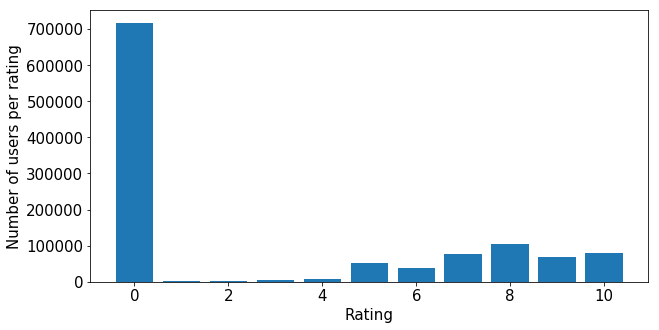

In [43]:
ratings_d = ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(ratings_d.index, ratings_d.values)
plt.xlabel('Rating')
plt.ylabel('Number of users per rating')
plt.show()

In similar rating problems, it seems that actual rating scale is from 1 to 10 and '0' is not an explicit rating. In most cases, a rating that is not explicit must be handled differently so we can remove the 0 ratings for now.

In [44]:
print('Number of ratings before zeros removal: {}'.format(len(ratings)))
ratings = ratings[ratings.book_rating != 0]
print('Number of ratings after zeros removal: {}'.format(len(ratings)))

Number of ratings before zeros removal: 1149780
Number of ratings after zeros removal: 433671


Now let's see the ratings distribution again

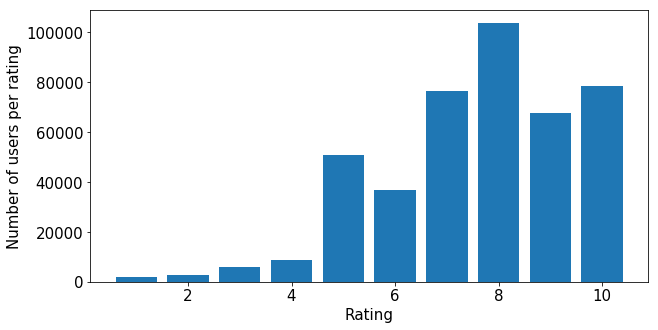

In [45]:
ratings_d = ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(ratings_d.index, ratings_d.values)
plt.xlabel('Rating')
plt.ylabel('Number of users per rating')
plt.show()

## Final dataframe

In [46]:
print('Number of books: {}'.format(len(books)))
print('Number of ratings: {}'.format(len(ratings)))
books_with_ratings = ratings.join(books.set_index('isbn'), on='isbn')
print('Number of books with ratings: {}'.format(len(books_with_ratings)))

Number of books: 271358
Number of ratings: 433671
Number of books with ratings: 433671


In [47]:
books_with_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
6,276736,3257224281,8,NaN,NaN,NaN,NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN


Remove rows with missing title/author data

In [48]:
books_with_ratings.dropna(subset=['book_title'], inplace=True)

Below we have a diagram with the most rated books

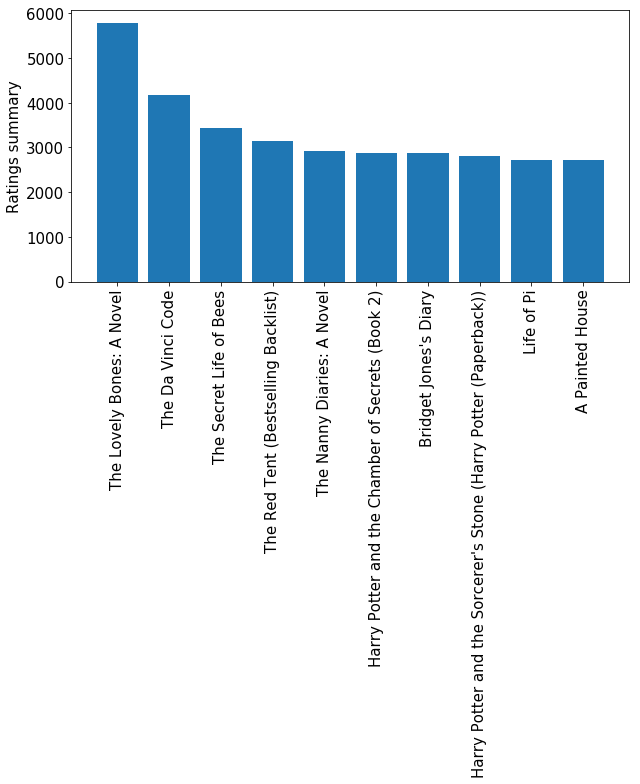

In [49]:
cm_rtg = books_with_ratings.groupby('book_title').book_rating.sum()
cm_rtg = cm_rtg.sort_values(ascending=False)[:10]
idx = cm_rtg.index.tolist() # Get sorted book titles
vals = cm_rtg.values.tolist() # Get corresponding cm_rtg values

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(range(len(idx)), vals)
plt.xticks(range(len(idx)), idx, rotation='vertical')
plt.ylabel('Ratings summary')
plt.show()

Now let's see the highest average ratings and also the lowest

In [50]:
cutoff = books_with_ratings.book_title.value_counts()
mean_rtg = books_with_ratings[books_with_ratings.book_title.isin(cutoff[cutoff>50].index)].groupby('book_title')['book_rating'].mean()
mean_rtg.sort_values(ascending=False)[:10] 

book_title
The Two Towers (The Lord of the Rings, Part 2)            9.330882
The Return of the King (The Lord of the Rings, Part 3)    9.213592
Harry Potter and the Goblet of Fire (Book 4)              9.125506
The Little Prince                                         9.111111
Charlotte's Web (Trophy Newbery)                          9.073529
Harry Potter and the Sorcerer's Stone (Book 1)            9.062500
84 Charing Cross Road                                     9.049180
Harry Potter and the Order of the Phoenix (Book 5)        9.047393
Harry Potter and the Prisoner of Azkaban (Book 3)         9.043321
To Kill a Mockingbird                                     8.977528
Name: book_rating, dtype: float64

In [51]:
mean_rtg.sort_values(ascending=False)[-10:]

book_title
Slow Waltz in Cedar Bend                                  6.619718
My Gal Sunday                                             6.607843
Hornet's Nest                                             6.591398
Bleachers                                                 6.583333
Full Tilt (Janet Evanovich's Full Series)                 6.568627
Songs in Ordinary Time (Oprah's Book Club (Paperback))    6.530303
4 Blondes                                                 5.653846
Isle of Dogs                                              5.433962
Four Blondes                                              5.393939
Wild Animus                                               4.390706
Name: book_rating, dtype: float64

In [52]:
books_with_ratings.groupby('book_title').isbn.nunique().sort_values(ascending=False)[:10]

book_title
The Secret Garden                 18
Selected Poems                    16
Dracula                           15
Adventures of Huckleberry Finn    15
Little Women                      14
Wuthering Heights                 14
Beloved                           14
Pride and Prejudice               14
Jane Eyre                         14
The Hobbit                        12
Name: isbn, dtype: int64

We want to create a unique_isbn such that a single book will only have 1 identifier when fed to the recommendation model

In [53]:
multiple_isbns = books_with_ratings.groupby('book_title').isbn.nunique()
has_mult_isbns = multiple_isbns.where(multiple_isbns>1)
has_mult_isbns.dropna(inplace=True) # NaNs removal means removal of books with only one ISBN

In [54]:
print('{} books with multiple ISBN'.format(len(has_mult_isbns)))

10231 books with multiple ISBN


We will export a dictionary with titles and multiple ISBNs into a pickle file for future use.

In [55]:
import pickle

pickle_file = os.path.join(data_dir, 'multiple_isbn_dict.pickle')
if multiple_isbn_pickle:
    def make_isbn_dict(df):
        title_isbn_dict = {}
        for title in has_mult_isbns.index:
            isbn_series = df.loc[df.book_title==title].isbn.unique()
            title_isbn_dict[title] = isbn_series.tolist()
        return title_isbn_dict

    dict_unique_isbn = make_isbn_dict(books_with_ratings)
    with open(pickle_file, 'wb') as handle:
        pickle.dump(dict_unique_isbn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [56]:
with open(pickle_file, 'rb') as handle:
    multiple_isbn_dict = pickle.load(handle)

Now we are going to pick the first ISBN as the unique ISBN of each book. It might take some time!

In [57]:
books_with_ratings['unique_isbn'] = books_with_ratings.apply(lambda row: multiple_isbn_dict[row.book_title][0] if row.book_title in multiple_isbn_dict.keys() else row.isbn, axis=1)

In [58]:
books_with_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,0060517794


And the final df is

In [59]:
books_users_ratings = books_with_ratings.join(users.set_index('user_id'), on='user_id')

In [60]:
len(books_users_ratings)

383820

In [61]:
books_users_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn,age,city,state,country
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224,NaN,seattle,washington,usa
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X,16.0,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028,16.0,rijeka,n/a,croatia
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X,NaN,torrance,california,usa
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,0060517794,25.0,iowa city,iowa,usa


## Recommender model

In [62]:
dataset = books_users_ratings[['user_id', 'unique_isbn', 'book_rating']]
dataset.head()

,user_id,unique_isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [63]:
dataset.shape

(383820, 3)

We should also convert the strings into numbers for the training process!

In [83]:
dataset['user_id'] = dataset['user_id'].astype('category').cat.codes.values
dataset['unique_isbn'] = dataset['unique_isbn'].astype('category').cat.codes.values
dataset.head()

,user_id,unique_isbn,book_rating
1,67537,11691,5
3,67538,54395,3
4,67538,54413,6
8,67539,34818,7
16,67540,2754,9


In [73]:
n_users = len(dataset['user_id'].unique())
n_books = len(dataset['unique_isbn'].unique())
print('Final number of users: {}'.format(n_users))
print('Final number of books: {}'.format(n_books))

Final number of users: 68087
Final number of books: 135559


We split our data into 80% training, 20% testing and 10% validation

In [84]:
from sklearn.model_selection import train_test_split
test_split = 0.2
validation_split = 0.1
train, test = train_test_split(dataset, test_size=test_split)
train, validation = train_test_split(train, test_size=validation_split)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
validation.reset_index(drop=True, inplace=True)
train.head()

,user_id,unique_isbn,book_rating
0,27700,77504,10
1,27423,15678,5
2,43562,105521,7
3,7122,19937,7
4,51921,30276,8


In [85]:
test.head()

,user_id,unique_isbn,book_rating
0,31625,71010,7
1,12672,84211,5
2,17010,32326,5
3,43240,107296,10
4,33372,84568,10


In [86]:
validation.head()

,user_id,unique_isbn,book_rating
0,2723,126634,7
1,4565,58975,6
2,58584,111171,9
3,30220,124870,9
4,12672,67168,10


Before describing the neural network that we used, it's important to mention some things about training. During training, we activated some useful Keras callbacks like adaptive learning rate and early stopping. Adaptive learning rate is a technique for decaying the learning rate according to "validation loss" value. When the loss stops reducing after some epochs, then the learning rate is being decayed. Early stopping is the same process for finishing the training after some epochs of no loss reduction. So we understand that the patience epochs of early stopping should be a bigger number than the adaptive learning rate patience epochs. Exponential decay of learning rate is also supported, which means that you cannot set both of them to true. Now let's set some parameters for the training process.

In [75]:
params={"batch_size": 256,
        "epochs":  15,
        "learning_rate":  0.01,
        "adaptive_learning_rate": True,
        "adaptive_lr_patience_epochs": 1,
        "adaptive_lr_decay": 0.2,
        "min_adaptive_lr": 0.0001,
        "exponential_lr": False,
        "num_epochs_per_decay": 2,
        "lr_decay_factor": 0.1,
        "early_stopping": False,
        "early_stopping_min_change": 0.05,
        "early_stopping_patience_epochs": 3,
        "log_test_predictions": True}

In [76]:
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers.merge import dot
from keras.utils import multi_gpu_model

# Class for learning rate view during training
class LRlogs(keras.callbacks.Callback):

    def on_epoch_begin(self, epoch, logs=None):
        lr = K.eval(self.model.optimizer.lr)
        print('learning_rate: {}'.format(lr))
        
callbacks = [LRlogs()]

if params['adaptive_learning_rate']:
    patience = params['adaptive_lr_patience_epochs']
    factor = params['adaptive_lr_decay']
    min_lr = params['min_adaptive_lr']
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=factor,
                                  patience=patience, min_lr=min_lr)
    callbacks.append(reduce_lr)

if params['early_stopping']:
    min_delta = params['early_stopping_min_change']
    patience = params['early_stopping_patience_epochs']
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=min_delta,
                                                   patience=patience, verbose=0,
                                                   mode='auto', baseline=None,
                                                   restore_best_weights=False)
    callbacks.append(early_stopping)


if params['exponential_lr']:
    def schedule(epoch, lr):
        epochs_per_decay = params['num_epochs_per_decay']
        decay_factor = params['lr_decay_factor']
        if epoch % epochs_per_decay == 0 and epoch != 0:
            return lr * decay_factor
        else:
            return lr
    exp_lr = keras.callbacks.LearningRateScheduler(schedule)
    callbacks.append(exp_lr)

The below neural network architecture is inspired from the paper [Neural Collaborative Filtering](https://arxiv.org/pdf/1708.05031.pdf). The most important detail of this network is the exploitation of both Matrix Factorization and Multi Layer Perceptron which are fused and provide us features with more information.

In [77]:
n_latent_factors_user = 15
n_latent_factors_book = 20
n_latent_factors_mf = 8

# Book embedding 
book_input = keras.layers.Input(shape=[1], name='Item')
book_embedding_mlp = keras.layers.Embedding(n_books + 1, n_latent_factors_book,
                                             name='Book-Embedding-MLP')(book_input)
book_vec_mlp = keras.layers.Flatten(name='FlattenBooks-MLP')(book_embedding_mlp)
book_vec_mlp = keras.layers.Dropout(0.2)(book_vec_mlp)

# Book Matrix Factorization
book_embedding_mf = keras.layers.Embedding(n_books + 1, n_latent_factors_mf, name='Book-Embedding-MF')(
    book_input)
book_vec_mf = keras.layers.Flatten(name='FlattenBooks-MF')(book_embedding_mf)
book_vec_mf = keras.layers.Dropout(0.2)(book_vec_mf)

# User embedding
user_input = keras.layers.Input(shape=[1], name='User')
user_vec_mlp = keras.layers.Flatten(name='FlattenUsers-MLP')(
    keras.layers.Embedding(n_users + 1, n_latent_factors_user, name='User-Embedding-MLP')(user_input))
user_vec_mlp = keras.layers.Dropout(0.2)(user_vec_mlp)

# User Matrix Factorization
user_vec_mf = keras.layers.Flatten(name='FlattenUsers-MF')(
    keras.layers.Embedding(n_users + 1, n_latent_factors_mf, name='User-Embedding-MF')(user_input))
user_vec_mf = keras.layers.Dropout(0.2)(user_vec_mf)

# User-Books MLP concatenation followed by more dense layers
concat = keras.layers.Concatenate()([book_vec_mlp, user_vec_mlp])
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200, name='FullyConnected')(concat_dropout)
dense_batch = keras.layers.BatchNormalization(name='Batch')(dense)
dropout_1 = keras.layers.Dropout(0.2, name='Dropout-1')(dense_batch)
dense_2 = keras.layers.Dense(100, name='FullyConnected-1')(dropout_1)
dense_batch_2 = keras.layers.BatchNormalization(name='Batch-2')(dense_2)

dropout_2 = keras.layers.Dropout(0.2, name='Dropout-2')(dense_batch_2)
dense_3 = keras.layers.Dense(50, name='FullyConnected-2')(dropout_2)
dense_4 = keras.layers.Dense(20, name='FullyConnected-3', activation='relu')(dense_3)

# Users-Book MF dot product
pred_mf = dot([book_vec_mf, user_vec_mf], name='Dot', axes=1)

pred_mlp = keras.layers.Dense(1, activation='relu', name='Activation')(dense_4)

# Fusion of MF and MLP
combine_mlp_mf = keras.layers.Concatenate()([pred_mf, pred_mlp])
result_combine = keras.layers.Dense(100, name='Combine-MF-MLP')(combine_mlp_mf)
deep_combine = keras.layers.Dense(100, name='FullyConnected-4')(result_combine)

result = keras.layers.Dense(1, name='Prediction')(deep_combine)

nn_model = keras.Model([user_input, book_input], result)

# If you can train on gpus you can use this line. It is not tested!
# nn_model = multi_gpu_model(nn_model, gpus=1)

nn_model.summary()
nn_model.compile(optimizer=Adam(lr=params['learning_rate']), loss='mean_absolute_error')


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Book-Embedding-MLP (Embedding)  (None, 1, 20)        2711200     Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding-MLP (Embedding)  (None, 1, 15)        1021320     User[0][0]                       
____________________________________________________________________________________________

Let's take a look on the above arhitecture: ![alt text](cf_nn.png)

We start training our model. If it's running on CPU be patient because it takes a while.

In [78]:
history = nn_model.fit([train['user_id'], train['unique_isbn']], train['book_rating'],
                       batch_size=params['batch_size'],
                       epochs=params['epochs'],
                       validation_data=([validation['user_id'], validation['unique_isbn']], validation['book_rating']),
                       verbose=1,
                       callbacks=callbacks)
print('End of training...')

Train on 276350 samples, validate on 30706 samples
Epoch 1/15
learning_rate: 0.00999999977648
276350/276350 [==============================] - 136s 491us/step - loss: 1.4646 - val_loss: 1.3475
Epoch 2/15
learning_rate: 0.00999999977648
276350/276350 [==============================] - 124s 449us/step - loss: 1.2756 - val_loss: 1.3779
Epoch 3/15
learning_rate: 0.00199999986216
276350/276350 [==============================] - 121s 438us/step - loss: 1.0628 - val_loss: 1.2627
Epoch 4/15
learning_rate: 0.00199999986216
276350/276350 [==============================] - 143s 518us/step - loss: 0.9757 - val_loss: 1.2594
Epoch 5/15
learning_rate: 0.00199999986216
276350/276350 [==============================] - 125s 452us/step - loss: 0.8992 - val_loss: 1.2809
Epoch 6/15
learning_rate: 0.000399999960791
276350/276350 [==============================] - 120s 434us/step - loss: 0.8159 - val_loss: 1.2689
Epoch 7/15
learning_rate: 9.99999974738e-05
276350/276350 [==============================] - 119

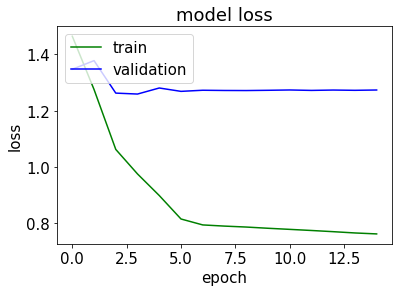

In [79]:
plt.plot(history.history['loss'], 'g')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [87]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Predictions on test set
predictions = nn_model.predict([test['user_id'], test['unique_isbn']])
meanAbsoluteError = mean_absolute_error(test['book_rating'],
                                        predictions)
meanSquaredError = mean_squared_error(test['book_rating'],
                                      predictions)

predictions = predictions.round().astype('int64')
predictions_df = pd.DataFrame(predictions, columns=['predictions'])
predictions_df = pd.concat([test, predictions_df], axis=1)
print(predictions_df.head(20))

print("Mean Absolute Error on test set: {}".format(meanAbsoluteError))
print("Mean Squared Error on test set: {}".format(meanSquaredError))
print("Root Mean Squared Error on test set: {}".format(sqrt(meanSquaredError)))

    user_id  unique_isbn  book_rating  predictions
0     31625        71010            7            8
1     12672        84211            5            7
2     17010        32326            5            5
3     43240       107296           10           10
4     33372        84568           10           10
5     62126        18007            6            8
6     33220        99836            8            8
7     39302        83020            8            7
8      2313        52457            9            9
9      2354        32731           10            9
10    22900        48067            8            8
11    49207        81053            7            7
12    59066         7816            7            7
13     2077       108350            8            7
14    55999        51007            8            8
15    21765        31389            8            7
16    55907        18964           10           10
17    29363        32345            9            9
18    62932        71813       

## Margins of improvement

Of course we can improve the above results by doing more experiments with better parameter tuning! We can choose different learning rate schedule, different batch size and also make some changes to the model like the embeddings size of users and books. It's worth mentioning that we can exploit more features from the data provided and create much more complex models. An idea is that we can create embeddings for author and publisher. We can also extract image features from a pretrained Convolutional Neural Network (like Inception v3) and use them as features for training. We can also create a multi-model architecture using a collaborative filtering architecture and a CNN and train them all together. In this way, we will have much more features to train and also much more data, because we won't have a unique isbn. But for doing this kind of experiments we need GPUs for faster results!